In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from Utils import *

In [2]:
random_state = 0

# Load data

In [3]:
train_directory = 'Cleaned/train_numerical.csv'
test_directory = 'Cleaned/validation_numerical.csv'

In [60]:
train_data = pd.read_csv(train_directory)
test_data = pd.read_csv(test_directory)
train_data.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,3,1896,3,6.811316e+10,4,1,275.0
1,3,1896,3,6.053890e+10,4,1,276.0
2,3,1790,3,6.811318e+10,1,1,283.0
3,3,1790,3,6.053882e+10,1,1,1000.0
4,3,1735,3,6.053880e+10,1,7,1001.0


In [61]:
features = ['Weekday', 'ScanCount', 'DepartmentDescription', 'FinelineNumber', 'Upc']
train = train_data[features].values
train_label = train_data.TripType.values
test = test_data[features].values
test_label = test_data.TripType.values
n_classes = np.unique(test_label)
cv_train = np.vstack([train,test])
cv_label = np.hstack([train_label, test_label])
del train_data
del test_data

In [66]:
print(train.shape)
print(test.shape)

(5142, 5)
(1287, 5)


# Training

In [20]:
classifier = svm.SVC(kernel='rbf', decision_function_shape='ovr')

In [21]:
classifier.fit(train, train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_score = classifier.decision_function(test)
pred = classifier.predict(test)

In [23]:
train_accuracy = classifier.score(train, train_label)
testing_accuracy = classifier.score(test, test_label)
print('Training accuracy =', train_accuracy)
print("Testing accuracy =", testing_accuracy)

Training accuracy = 0.845001944769
Testing accuracy = 0.851592851593


## Cross Validation

In [26]:
combine_train = np.vstack([train, test])
combine_label = np.hstack([train_label, test_label])

In [25]:
cv_result = crossValidation(combine_train, combine_label, classifier, 3)

In [26]:
print("The result for each fold is \n", cv_result)
print("The average result is ", cv_result.mean())

The result for each fold is 
 [[ 0.41661481]
 [ 0.41306376]]
The average result is  0.414839286907


## Stratified Cross Validation

In [29]:
# scv_result = scv(combine_train, combine_label, classifier, cv = 3)
# print("The result for each fold is \n", scv_result)
# print("The average result is ", scv_result.mean())

# Grid Search on C

In [45]:
c_options = [0.01, 0.05, 0.1, 0.5 , 1, 10]
num_options = len(c_options)
numer_of_cv = 5
search_result = np.zeros([num_options, numer_of_cv])
for i in range(num_options):
    clf = svm.SVC(C = c_options[i], kernel='rbf', decision_function_shape='ovr')
    values = crossValidation(combine_train, combine_label, clf, numer_of_cv)
    values = np.ravel(values)
    search_result[i, :] = values

In [57]:
opt = np.argmax(search_result.mean(axis = 1))
print('The best result is obtained with C  = %0.2f, mean = %f, std = %f' % (c_options[opt], search_result[opt,:].mean(),
                                                                          search_result[opt,:].std()))

The best result is obtained with C  = 1.00, mean = 0.462747, std = 0.017294


## Confusion Matrix

In [58]:
confusion_mat = confusion_matrix(pred, test_label, np.unique(train_label).tolist())
confusion = pd.DataFrame(confusion_mat)
confusion.columns = np.unique(train_label)
confusion.head(8)

,3,4,5,6,7,8,9,15,18,19,...,36,37,38,39,40,41,42,43,44,999
0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,28.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,10.0,19.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0


## Micro ROC Curve

In [15]:
lb = LabelBinarizer()
new_test_label = lb.fit(train_label).transform(test_label)
fpr, tpr = roc_curve(new_test_label.ravel(), y_score.ravel())

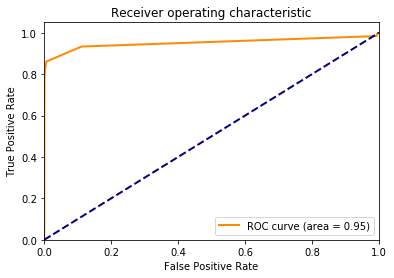

In [16]:
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()